# Smoothing data

This notebook highlights how signals can be smoothed with the smooth function.

In [1]:
using Plots, Spectra, Random, Statistics

[ Info: Precompiling Spectra [391af1a9-06f1-59d3-8d21-0be089654739] (cache misses: include_dependency fsize change (2), wrong dep version loaded (2), mismatched flags (14))


## Signal generation

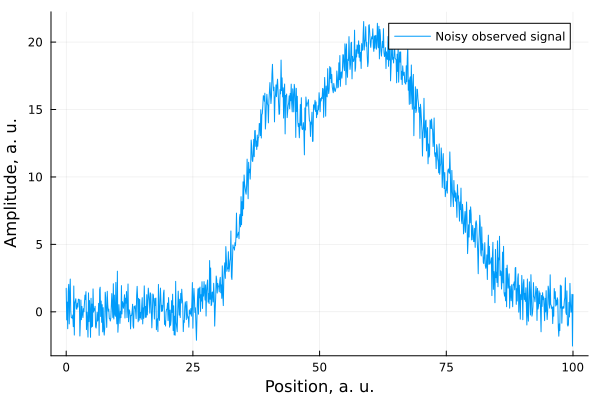

In [2]:
# the x axis
x = collect(0:0.1:100)

# a fake signal: perfect y
y_tot, y_peaks = gaussiennes([10;20.],[40.;60],[5.;15],x)
y_perfect = vec(y_tot)

# we add noise: observed y
y = y_perfect .+ randn(size(y_tot,1))

plot(x, y, 
    label="Noisy observed signal",
    xlabel = "Position, a. u.", 
    ylabel="Amplitude, a. u.")


## Smoothing

Now we loop other available methods to smooth the signal with default parameters. Beware that changing defaults e.g. for `savgol` or `whittaker` may improve (or not) your smoothed signals! One needs to try tuning them. 

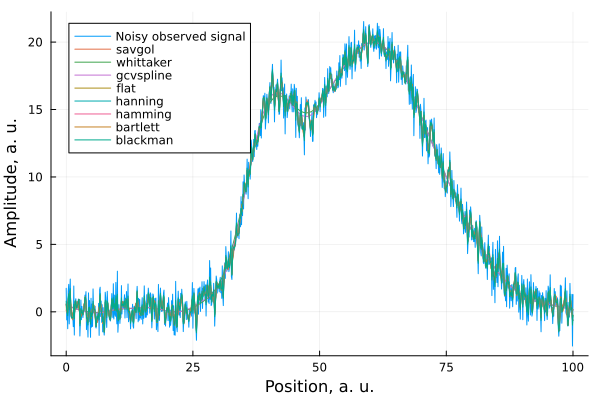

In [3]:
methods_ = ["savgol", "whittaker", "gcvspline", "flat", "hanning", "hamming", "bartlett", "blackman"]
ese_methods_ = zeros(size(methods_))

p1 = plot(x,y,label="Noisy observed signal",
    xlabel = "Position, a. u.", ylabel="Amplitude, a. u.",
    legend=:topleft)
for (index, i) in enumerate(methods_)
    y_smo = smooth(x, y, method=i)
    plot!(x, y_smo, label=i)
    ese_methods_[index] = sum((y_perfect - y_smo).^2)
end
display(p1)

## Compare performances

We can compare the performances of the different methods using a bar plot:

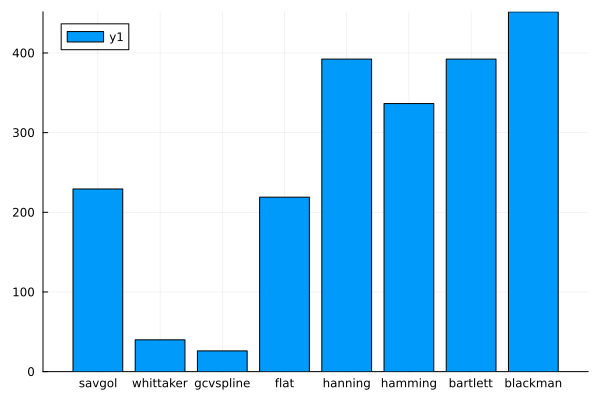

In [4]:
p2 = bar(ese_methods_, xticks=(1:8,methods_))
display(p2)